In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras.layers import Flatten, Dropout, Dense

In [3]:
df=pd.read_csv('cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['age'] = df['age']/ 365

In [9]:
df.drop("id",axis=1,inplace= True)

In [10]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


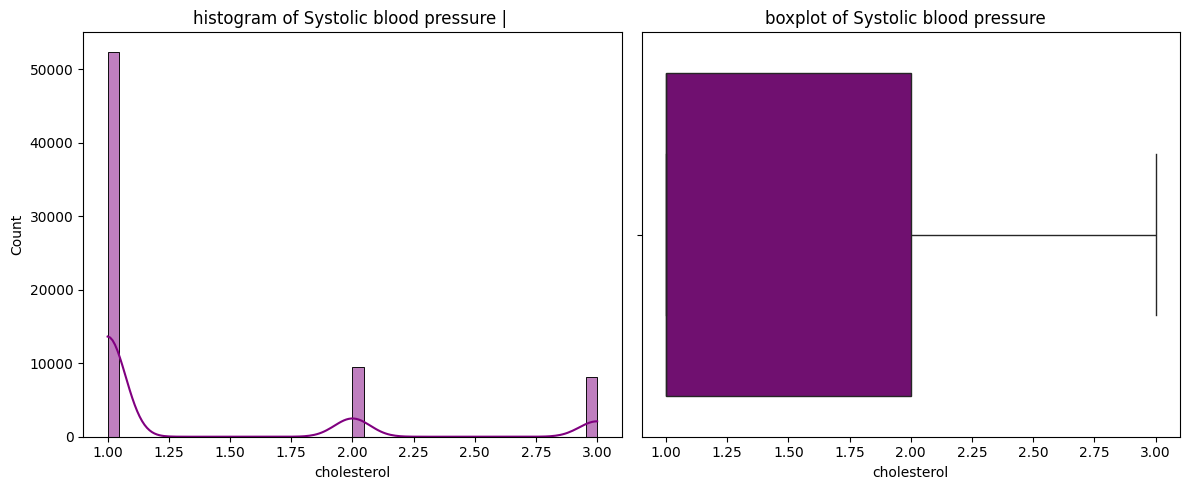

In [11]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(df['cholesterol'], kde=True, color='purple')
plt.title("histogram of Systolic blood pressure | " )

plt.subplot(1, 2, 2)
sns.boxplot(x=df['cholesterol'], color='purple')
plt.title("boxplot of Systolic blood pressure  " )

plt.tight_layout()
plt.show()

In [12]:
x= df.drop(['cardio'], axis=1)
y= df['cardio']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [14]:
scaler = StandardScaler()
for col in x.columns:
    if x[col].dtype != 'object':
        x[col] = scaler.fit_transform(x[[col]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
svmwith_linear = SVC(kernel='linear', C=0.3)
svmwith_linear.fit(x_train, y_train)


SVC(C=0.3, kernel='linear')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        

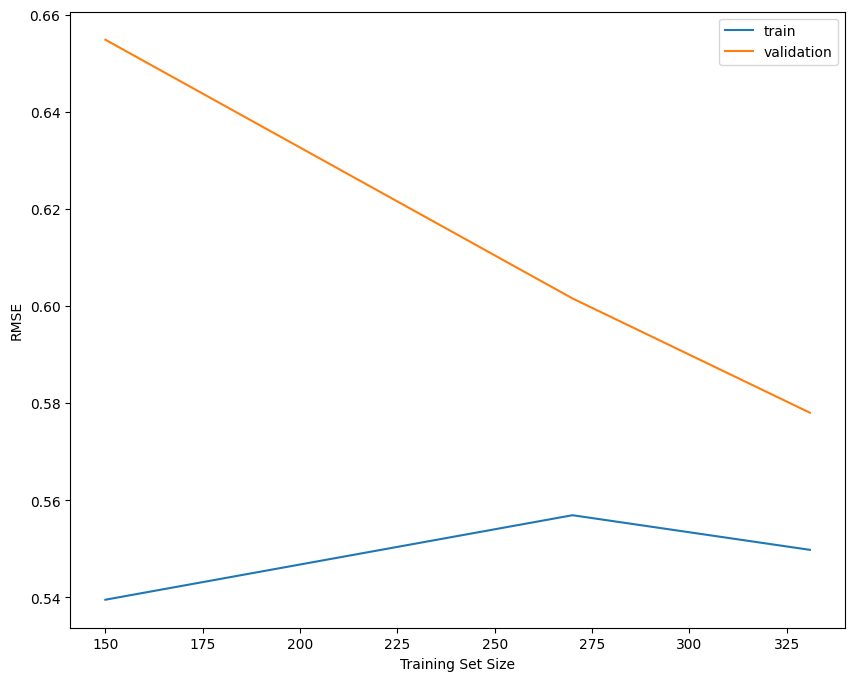

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svmwith_linear,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 150, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show();


In [18]:
y_trainPred=svmwith_linear.predict(x_train)
print("SVM modeL with linear kernel accuracy of train data:", accuracy_score(y_train, y_trainPred))


SVM modeL with linear kernel accuracy of train data: 0.7240535714285714


In [19]:
yPred = svmwith_linear.predict(x_test)
print("SVM modeL with linear kernel accuracy of test data:", accuracy_score(y_test, yPred))


SVM modeL with linear kernel accuracy of test data: 0.7214285714285714


In [20]:

print("___________________________train classification report_______________________________\n", classification_report(y_train, y_trainPred))

print("\n___________________________test classification report_______________________________\n", classification_report(y_test, yPred))


___________________________train classification report_______________________________
               precision    recall  f1-score   support

           0       0.69      0.81      0.75     27952
           1       0.77      0.64      0.70     28048

    accuracy                           0.72     56000
   macro avg       0.73      0.72      0.72     56000
weighted avg       0.73      0.72      0.72     56000


___________________________test classification report_______________________________
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      7069
           1       0.77      0.63      0.69      6931

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



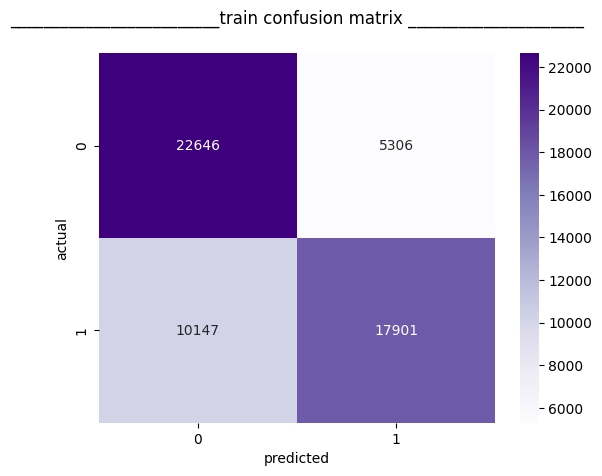

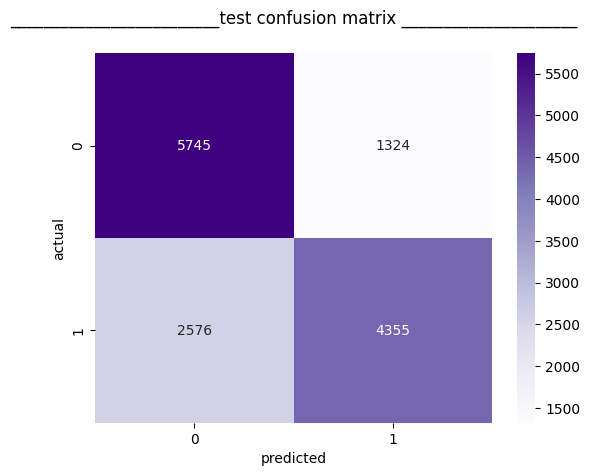

In [21]:
sns.heatmap(confusion_matrix(y_train, y_trainPred), annot=True, fmt='d', cmap='Purples')
plt.title("_________________________train confusion matrix _____________________\n")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

print("\n")
sns.heatmap(confusion_matrix(y_test, yPred), annot=True, fmt='d', cmap='Purples')
plt.title("_________________________test confusion matrix _____________________\n")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


////////////////////////

In [22]:
svmwith_poly= SVC(kernel='poly', C=0.7)
svmwith_poly.fit(x_train, y_train)

SVC(C=0.7, kernel='poly')

In [23]:
y_trainPredpoly=svmwith_poly.predict(x_train)
print("SVM modeL with linear kernel accuracy of train data:", accuracy_score(y_train, y_trainPredpoly))
yPredpoly= svmwith_poly.predict(x_test)
print("SVM modeL with linear kernel accuracy of test data:", accuracy_score(y_test, yPredpoly))


SVM modeL with linear kernel accuracy of train data: 0.6838214285714286
SVM modeL with linear kernel accuracy of test data: 0.6769285714285714


In [24]:

print("___________________________train classification report_______________________________\n", classification_report(y_train, y_trainPredpoly))

print("\n___________________________test classification report_______________________________\n", classification_report(y_test, yPredpoly))


___________________________train classification report_______________________________
               precision    recall  f1-score   support

           0       0.64      0.82      0.72     27952
           1       0.75      0.55      0.63     28048

    accuracy                           0.68     56000
   macro avg       0.70      0.68      0.68     56000
weighted avg       0.70      0.68      0.68     56000


___________________________test classification report_______________________________
               precision    recall  f1-score   support

           0       0.64      0.82      0.72      7069
           1       0.75      0.53      0.62      6931

    accuracy                           0.68     14000
   macro avg       0.69      0.68      0.67     14000
weighted avg       0.69      0.68      0.67     14000



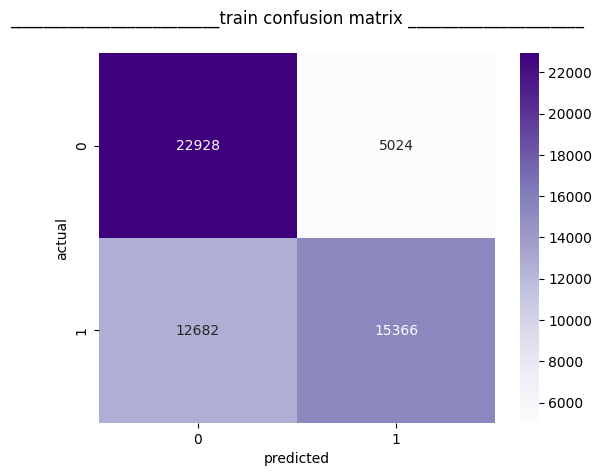

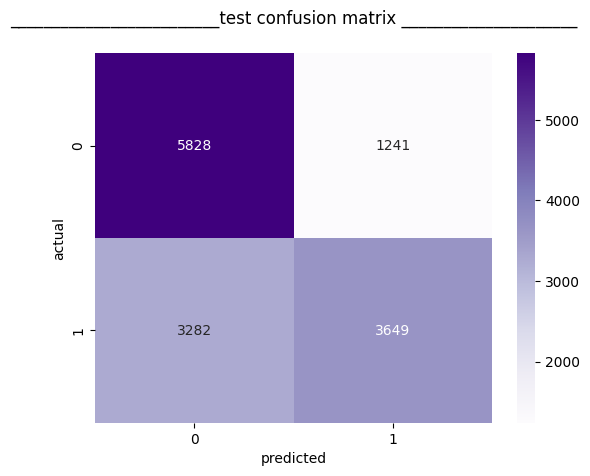

In [32]:
sns.heatmap(confusion_matrix(y_train, y_trainPredpoly), annot=True, fmt='d', cmap='Purples')
plt.title("_________________________train confusion matrix _____________________\n")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

print("\n")
sns.heatmap(confusion_matrix(y_test, yPredpoly), annot=True, fmt='d', cmap='Purples')
plt.title("_________________________test confusion matrix _____________________\n")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        

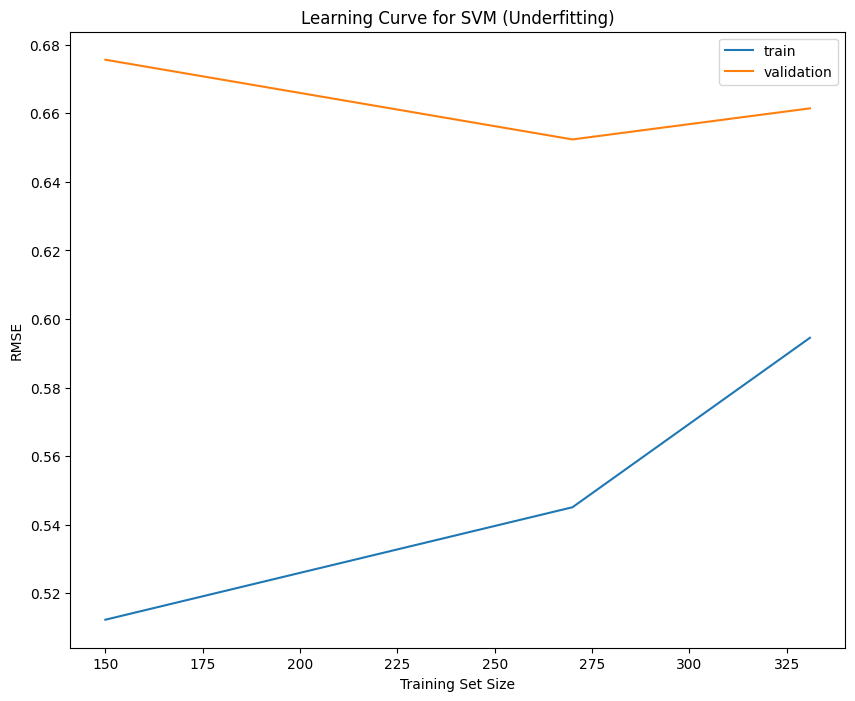

In [26]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svmwith_poly,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 150, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve for SVM (Underfitting)")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


In [27]:
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(x_train)
X_test_clf_scaled = scaler_clf.transform(x_test)

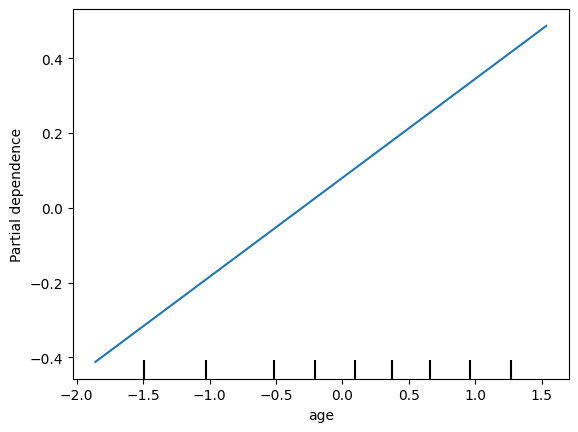

In [31]:
from sklearn.inspection import PartialDependenceDisplay
feature = [0]
target_class = 0  # choose the class you want PDP for

PartialDependenceDisplay.from_estimator(svmwith_linear, x_test, features=feature, target=target_class)
plt.show()

paper 2: Cardiovascular disease diagnosis: a holistic approach using the integration of machine learning and deep learning models

In [34]:
import numpy as np


In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = np.expand_dims(x_scaled, axis=2)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print("accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6564 - loss: 0.6495 - val_accuracy: 0.7145 - val_loss: 0.5636
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7126 - loss: 0.5703 - val_accuracy: 0.7195 - val_loss: 0.5600
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7213 - loss: 0.5571 - val_accuracy: 0.7296 - val_loss: 0.5523
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7251 - loss: 0.5562 - val_accuracy: 0.7282 - val_loss: 0.5503
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7241 - loss: 0.5570 - val_accuracy: 0.7243 - val_loss: 0.5540
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7249 - loss: 0.5581 - val_accuracy: 0.7297 - val_loss: 0.5504
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7313 - loss: 0.5514 - val_accuracy: 0.7259 - val_loss: 0.5498
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7304 - loss: 0.5